<a href="https://colab.research.google.com/github/Sanjiwanibhume/Data-analyst/blob/main/Instagram_fake_spammer_genuine_accounts_final_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Instagram fake spammer genuine accounts final **

# This Python 3 environment comes with many helpful analytics
libraries installed
# It is defined by the kaggle/python Docker image:
https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

In [ ]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report,confusion_matrix

In [ ]:
# Load the dataset
data = pd.read_csv('/content/train.csv') # replace with the path to your dataset

In [ ]:
df_train = pd.read_csv('/content/train.csv')

In [ ]:
df_train.head()

,profile pic,nums/length username,fullname words,nums/length fullname,name==username,description length,external URL,private,#posts,#followers,#follows,fake
0,1,0.27,0,0.0,0,53,0,0,32,1000,955,0
1,1,0.00,2,0.0,0,44,0,0,286,2740,533,0
2,1,0.10,2,0.0,0,0,0,1,13,159,98,0
3,1,0.00,1,0.0,0,82,0,0,679,414,651,0
4,1,0.00,2,0.0,0,0,0,1,6,151,126,0


In [ ]:
data.head()

,profile pic,nums/length username,fullname words,nums/length fullname,name==username,description length,external URL,private,#posts,#followers,#follows,fake
0,1,0.27,0,0.0,0,53,0,0,32,1000,955,0
1,1,0.00,2,0.0,0,44,0,0,286,2740,533,0
2,1,0.10,2,0.0,0,0,0,1,13,159,98,0
3,1,0.00,1,0.0,0,82,0,0,679,414,651,0
4,1,0.00,2,0.0,0,0,0,1,6,151,126,0


In [ ]:
data.shape

(576, 12)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 576 entries, 0 to 575
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   profile pic           576 non-null    int64  
 1   nums/length username  576 non-null    float64
 2   fullname words        576 non-null    int64  
 3   nums/length fullname  576 non-null    float64
 4   name==username        576 non-null    int64  
 5   description length    576 non-null    int64  
 6   external URL          576 non-null    int64  
 7   private               576 non-null    int64  
 8   #posts                576 non-null    int64  
 9   #followers            576 non-null    int64  
 10  #follows              576 non-null    int64  
 11  fake                  576 non-null    int64  
dtypes: float64(2), int64(10)
memory usage: 54.1 KB


In [ ]:
data.describe()

,profile pic,nums/length username,fullname words,nums/length fullname,name==username,description length,external URL,private,#posts,#followers,#follows,fake
count,576.000000,576.000000,576.000000,576.000000,576.000000,576.000000,576.000000,576.000000,576.000000,5.760000e+02,576.000000,576.000000
mean,0.701389,0.163837,1.460069,0.036094,0.034722,22.623264,0.116319,0.381944,107.489583,8.530724e+04,508.381944,0.500000
std,0.458047,0.214096,1.052601,0.125121,0.183234,37.702987,0.320886,0.486285,402.034431,9.101485e+05,917.981239,0.500435
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000
25%,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.900000e+01,57.500000,0.000000
50%,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9.000000,1.505000e+02,229.500000,0.500000
75%,1.000000,0.310000,2.000000,0.000000,0.000000,34.000000,0.000000,1.000000,81.500000,7.160000e+02,589.500000,1.000000
max,1.000000,0.920000,12.000000,1.000000,1.000000,150.000000,1.000000,1.000000,7389.000000,1.533854e+07,7500.000000,1.000000


In [ ]:
data.isnull().sum()

,0
profile pic,0
nums/length username,0
fullname words,0
nums/length fullname,0
name==username,0
description length,0
external URL,0
private,0
#posts,0
#followers,0


In [ ]:
data['fake'].value_counts()

,count
fake,
0,288
1,288


In [ ]:
data.nunique()

,0
profile pic,2
nums/length username,54
fullname words,9
nums/length fullname,25
name==username,2
description length,104
external URL,2
private,2
#posts,193
#followers,372


In [ ]:
data.corr()

,profile pic,nums/length username,fullname words,nums/length fullname,name==username,description length,external URL,private,#posts,#followers,#follows,fake
profile pic,1.000000,-0.364087,0.213295,-0.131756,-0.124903,0.367892,0.236729,0.114732,0.169570,0.061137,0.194833,-0.637315
nums/length username,-0.364087,1.000000,-0.225472,0.408567,0.056890,-0.321170,-0.237125,-0.063713,-0.157442,-0.062785,-0.172413,0.587687
fullname words,0.213295,-0.225472,1.000000,-0.094348,-0.082969,0.272522,0.196562,-0.089070,0.073350,0.033225,0.094855,-0.298793
nums/length fullname,-0.131756,0.408567,-0.094348,1.000000,0.291149,-0.117521,-0.088724,-0.030030,-0.057716,-0.027035,-0.067971,0.246782
name==username,-0.124903,0.056890,-0.082969,0.291149,1.000000,-0.064814,-0.039232,0.046084,-0.049808,-0.017761,-0.009529,0.170695
description length,0.367892,-0.321170,0.272522,-0.117521,-0.064814,1.000000,0.482313,-0.110329,0.144824,0.005929,0.226561,-0.460825
external URL,0.236729,-0.237125,0.196562,-0.088724,-0.039232,0.482313,1.000000,-0.162612,0.165008,0.027189,0.142519,-0.362809
private,0.114732,-0.063713,-0.089070,-0.030030,0.046084,-0.110329,-0.162612,1.000000,-0.087495,-0.073473,-0.057542,-0.028586
#posts,0.169570,-0.157442,0.073350,-0.057716,-0.049808,0.144824,0.165008,-0.087495,1.000000,0.321385,0.098225,-0.245355
#followers,0.061137,-0.062785,0.033225,-0.027035,-0.017761,0.005929,0.027189,-0.073473,0.321385,1.000000,-0.011066,-0.093689


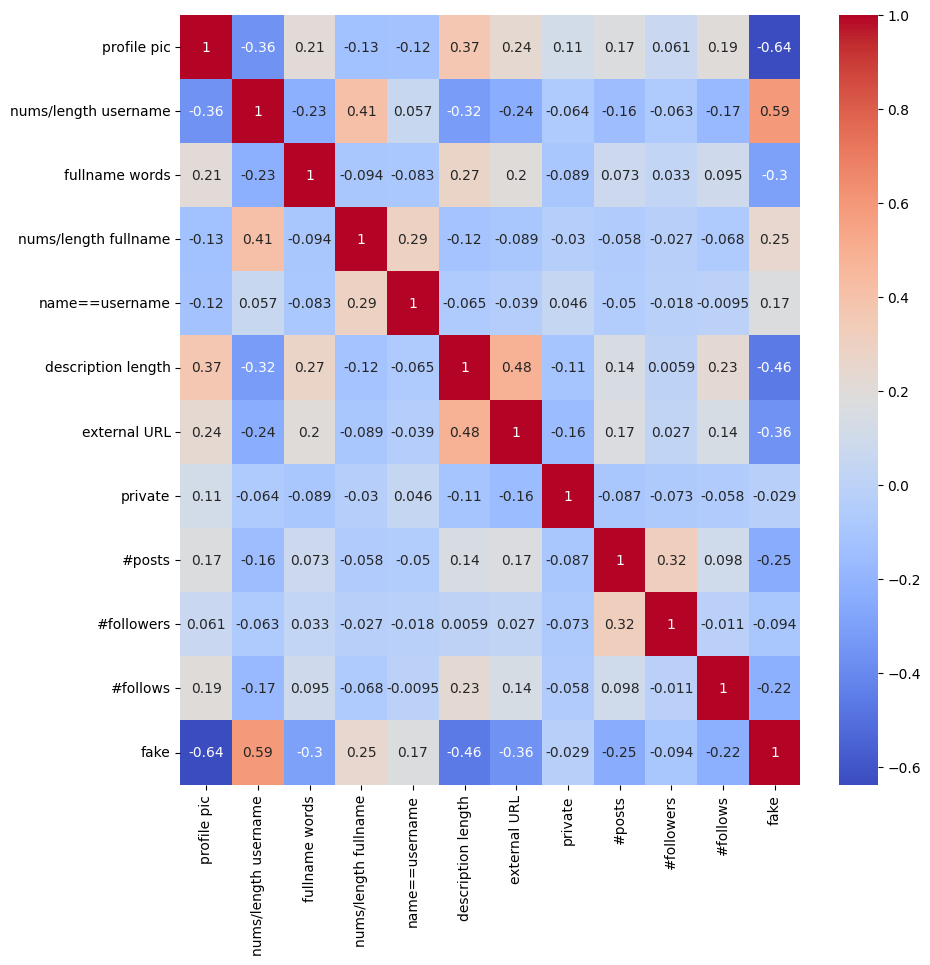

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(10,10))
sns.heatmap(data.corr(), annot=True, cmap='coolwarm')

plt.show()

h
i
s
t
(
f
i
g
s
i
z
e
=
(
1
0
,
1
0
)
)

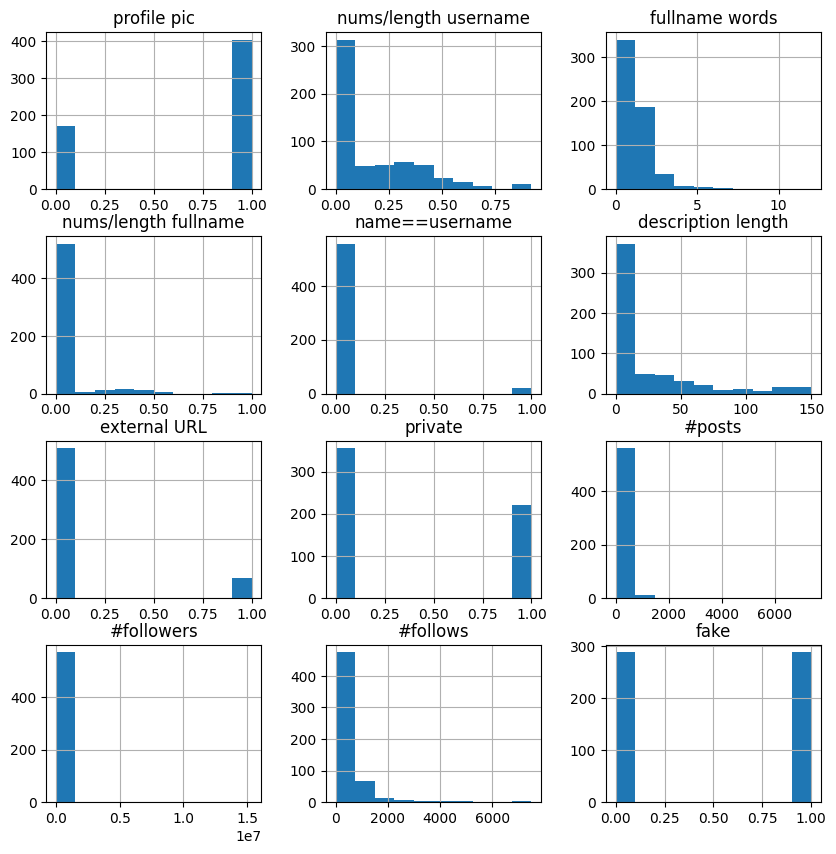

In [ ]:
data.hist(figsize=(10,10))
plt.show()

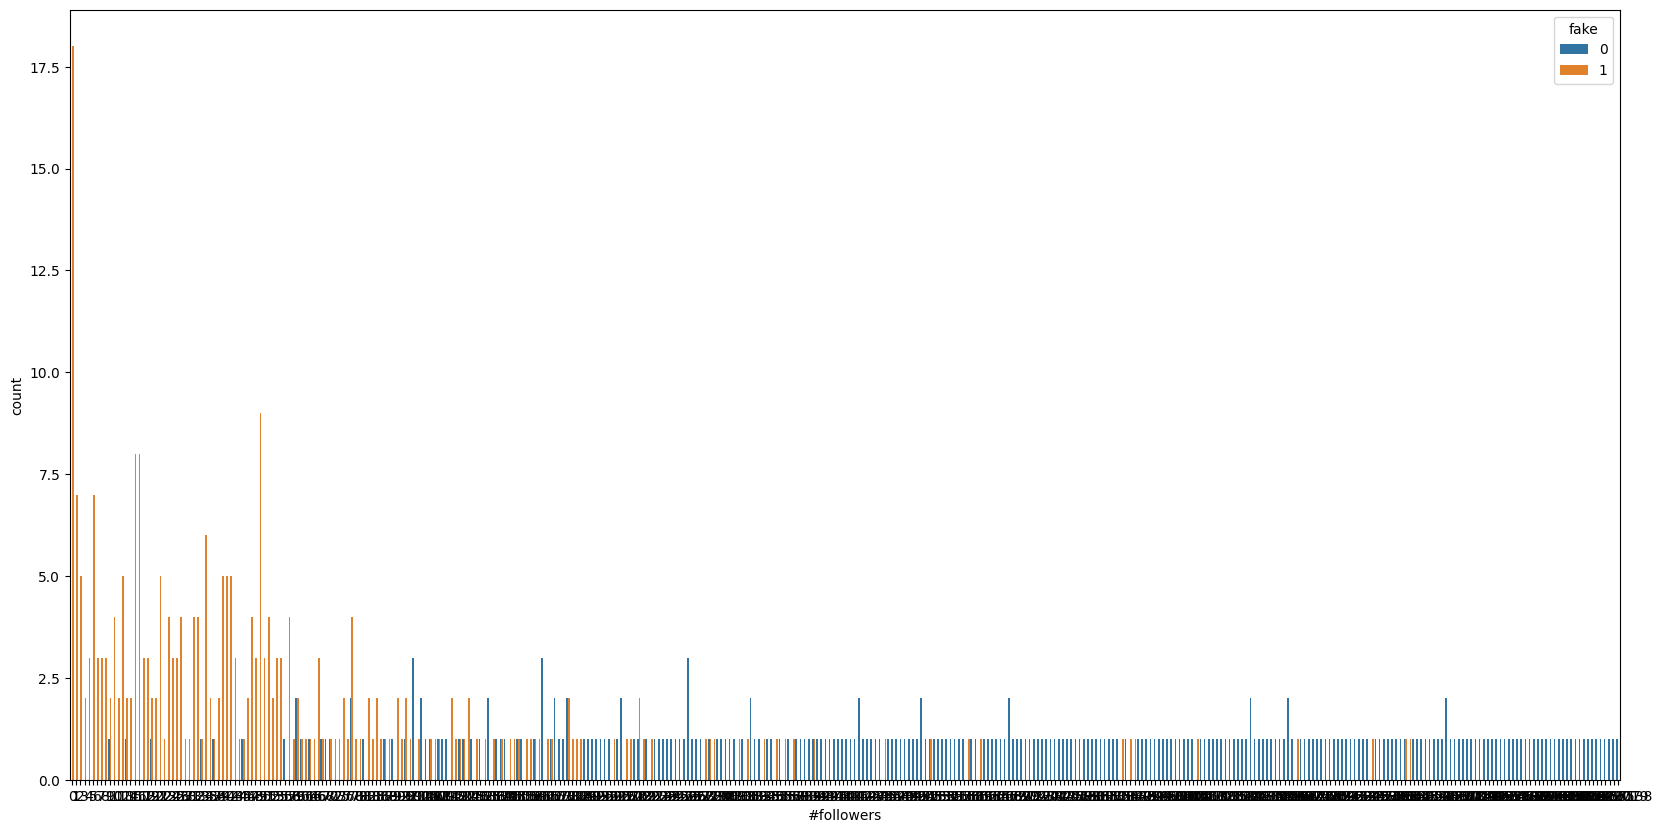

In [ ]:
plt.figure(figsize=(20,10))
sns.countplot(x='#followers', hue='fake', data=df_train)
plt.show()

In [ ]:
# create bins for #followers column
bins = [0, 25, 50, 100, 200, 300, 400, 500, 1000, 5000, 10000]

In [ ]:
# cut the #followers column into the bins
df_train['#followers_bins'] = pd.cut(df_train['#followers'],
bins=bins)

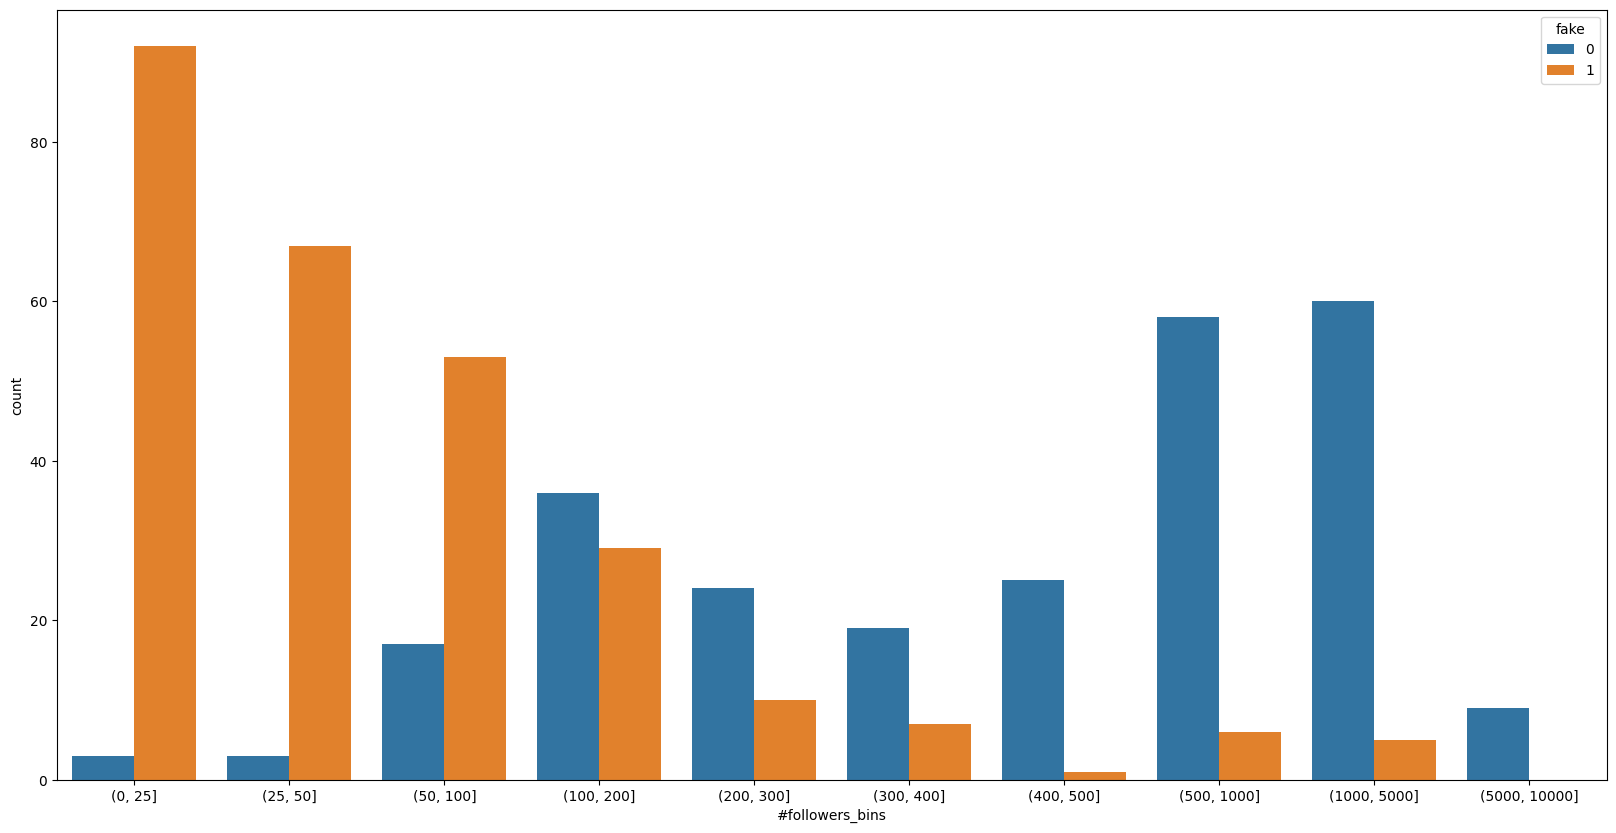

In [ ]:
# plot #followers with bins and show fake value counts
plt.figure(figsize=(20,10))
sns.countplot(x='#followers_bins', hue='fake', data=df_train)
plt.show()

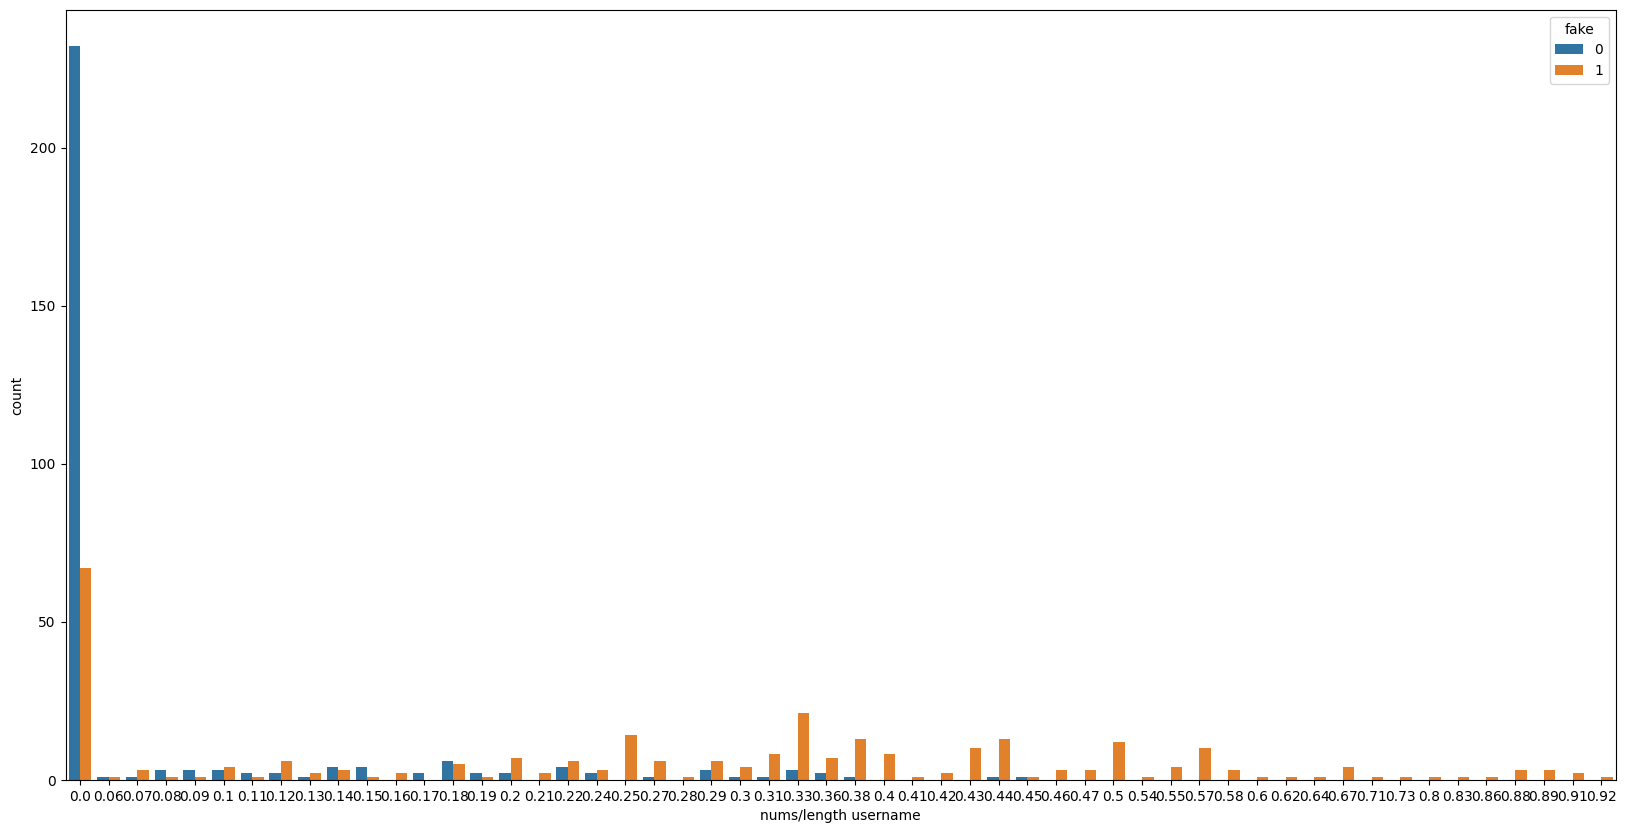

In [ ]:
# plot nums/length username and show fake value counts
plt.figure(figsize=(20,10))
sns.countplot(x='nums/length username', hue='fake',
data=df_train)
plt.show()

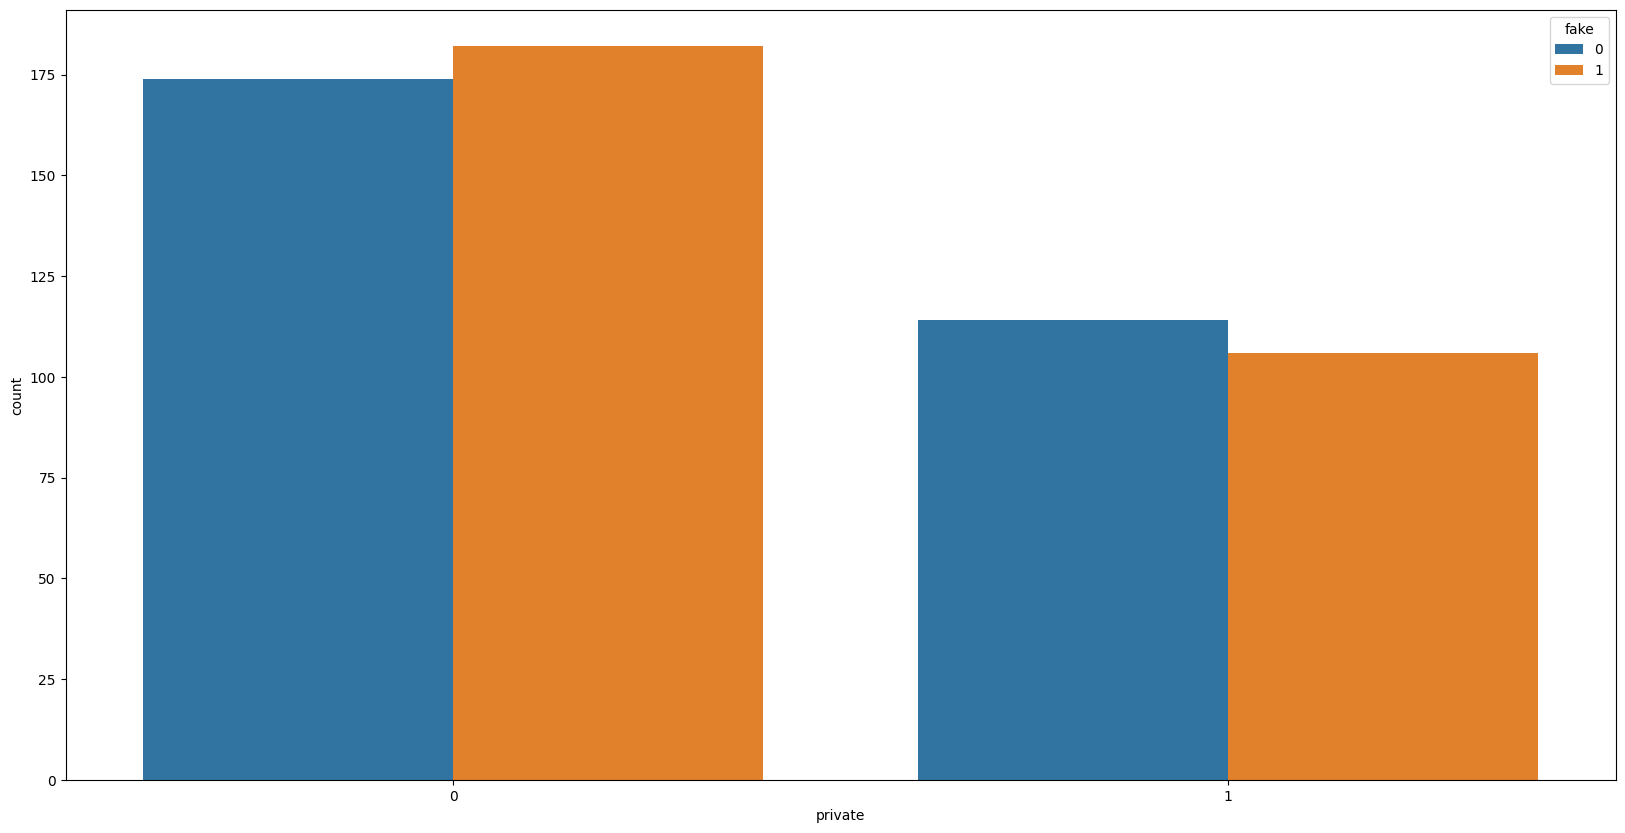

In [ ]:
# how is fake distributed amongst private accounts
plt.figure(figsize=(20,10))
sns.countplot(x='private', hue='fake', data=df_train)
plt.show()

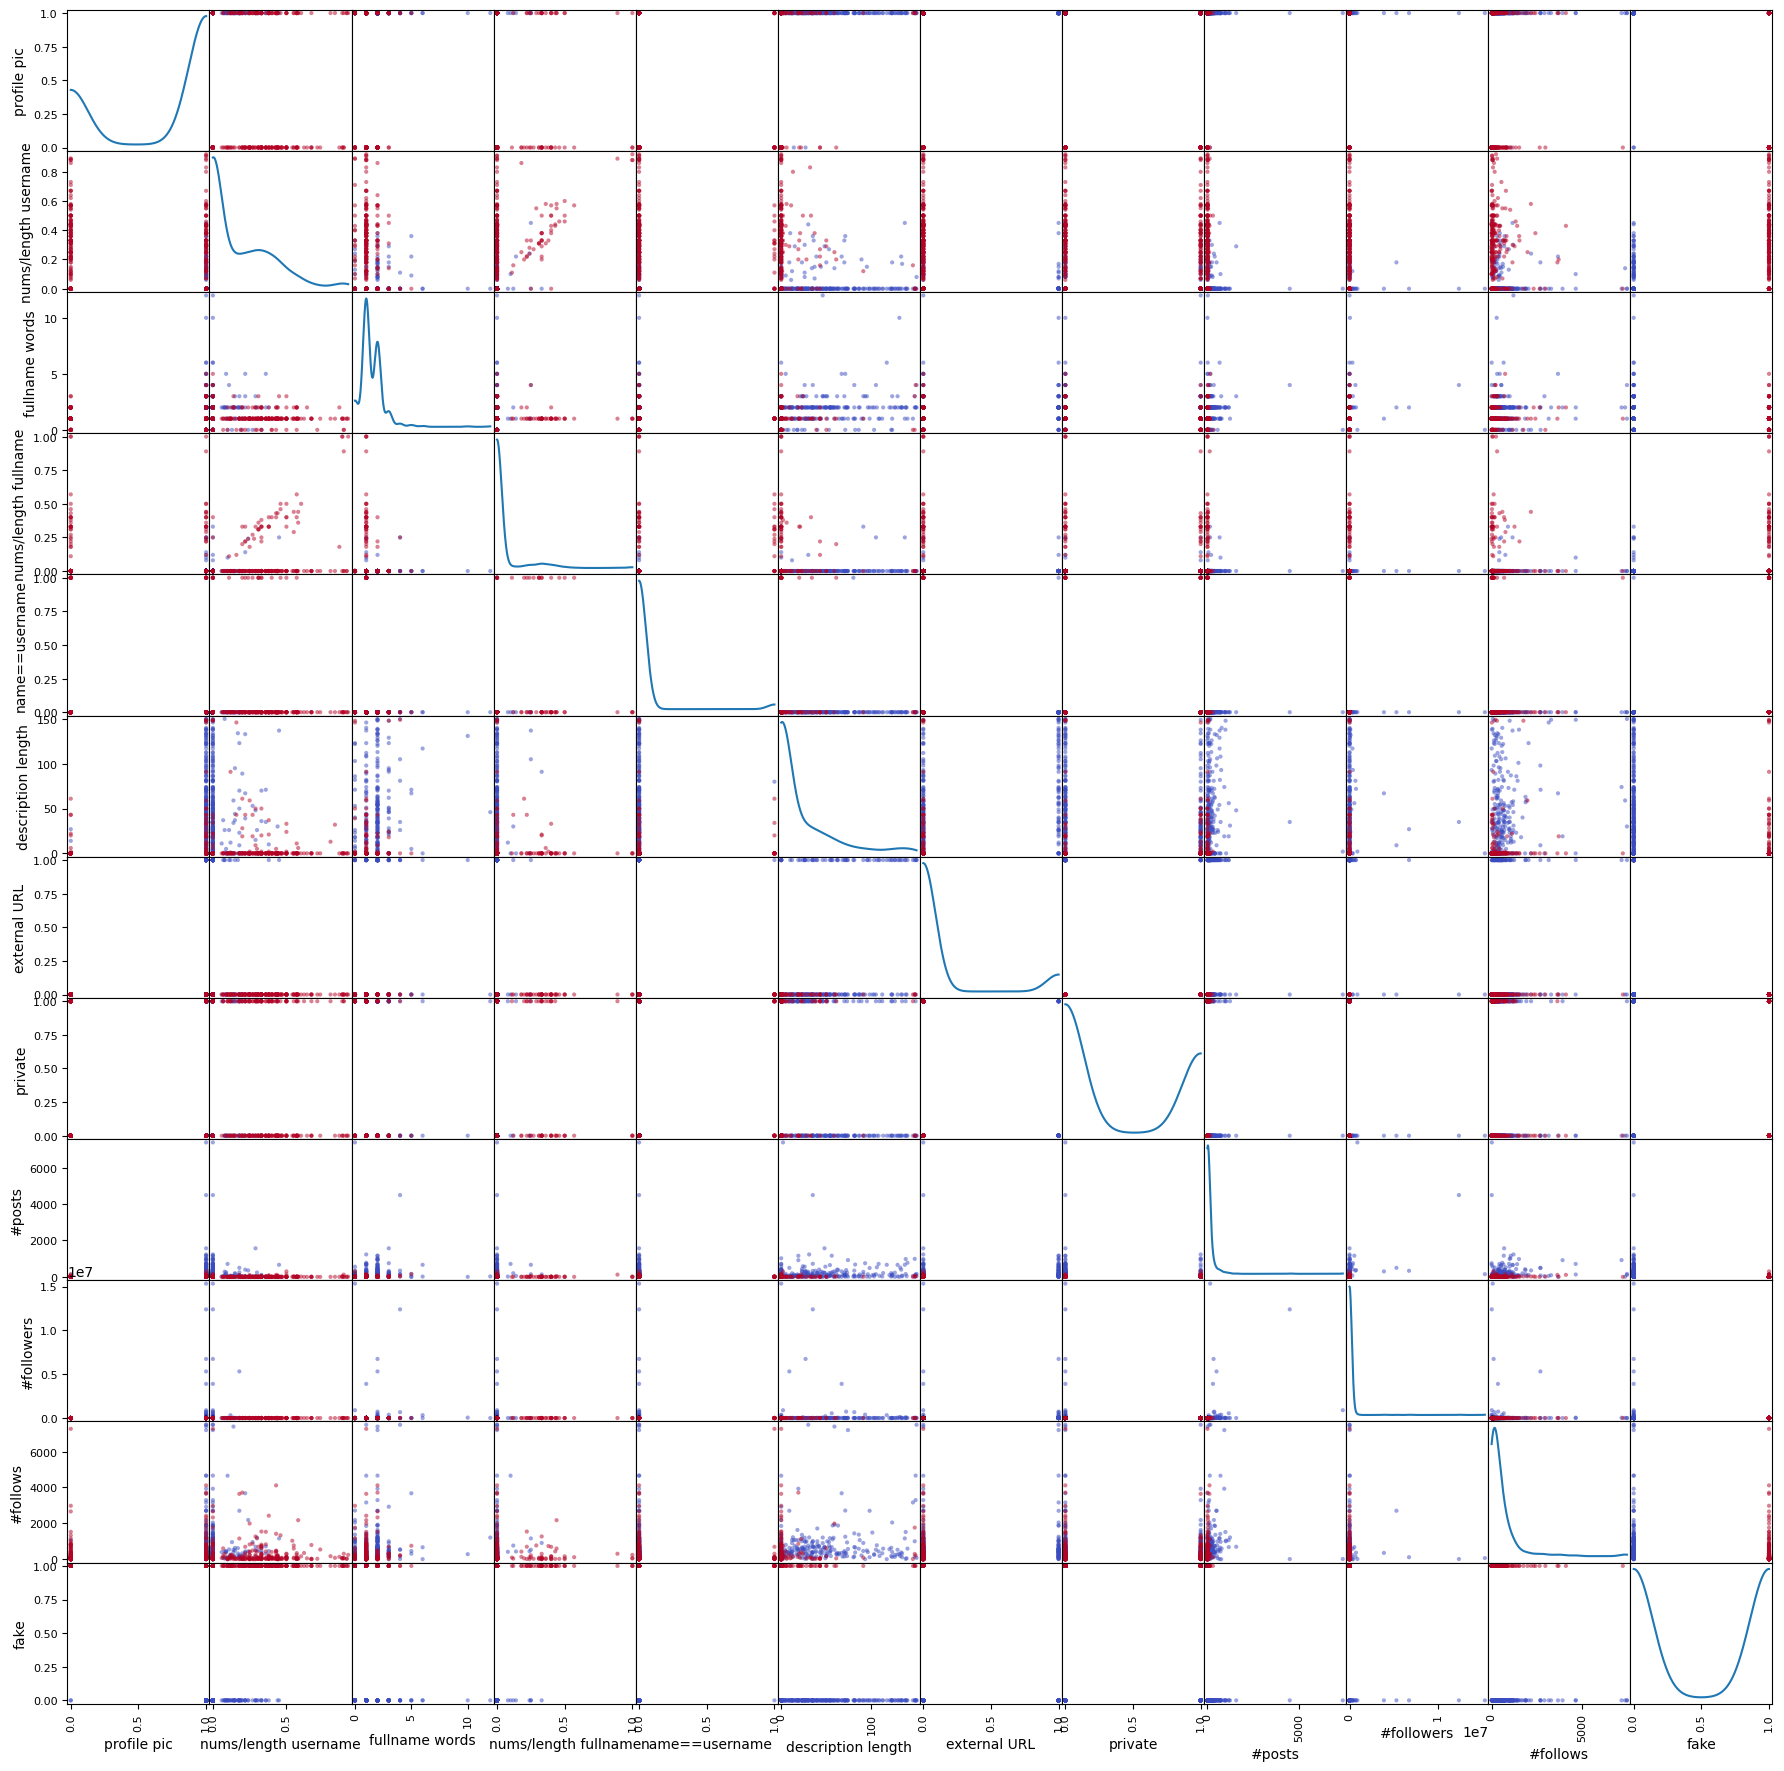

In [ ]:
from pandas.plotting import scatter_matrix
scatter_matrix(df_train, figsize=(22,22), diagonal='kde',
c=df_train['fake'], cmap='coolwarm')

plt.show()

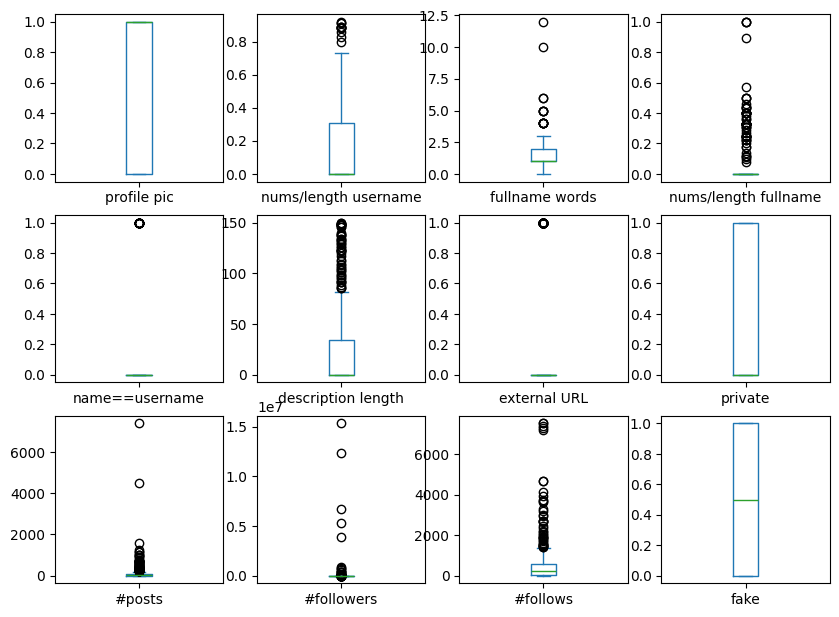

In [ ]:
df_train.plot(kind='box', subplots=True, layout=(4,4),
figsize=(10,10))

plt.show()

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix,classification_report

In [ ]:
X = df_train.drop(['#followers_bins', 'fake'], axis=1)
y = df_train['fake']

X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.2, random_state=42)


model = DecisionTreeClassifier()
print(X_train.dtypes)
print(y_train.dtypes)

profile pic               int64
nums/length username    float64
fullname words            int64
nums/length fullname    float64
name==username            int64
description length        int64
external URL              int64
private                   int64
#posts                    int64
#followers                int64
#follows                  int64
dtype: object
int64


In [ ]:
model.fit(X_train, y_train)

DecisionTreeClassifier()

In [ ]:
DecisionTreeClassifier()

DecisionTreeClassifier()

In [ ]:
y_pred = model.predict(X_test)

In [ ]:
accuracy_score(y_test, y_pred)

0.8879310344827587

In [ ]:
confusion_matrix(y_test, y_pred)

array([[59,  4],
       [ 9, 44]])

In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.87      0.94      0.90        63
           1       0.92      0.83      0.87        53

    accuracy                           0.89       116
   macro avg       0.89      0.88      0.89       116
weighted avg       0.89      0.89      0.89       116



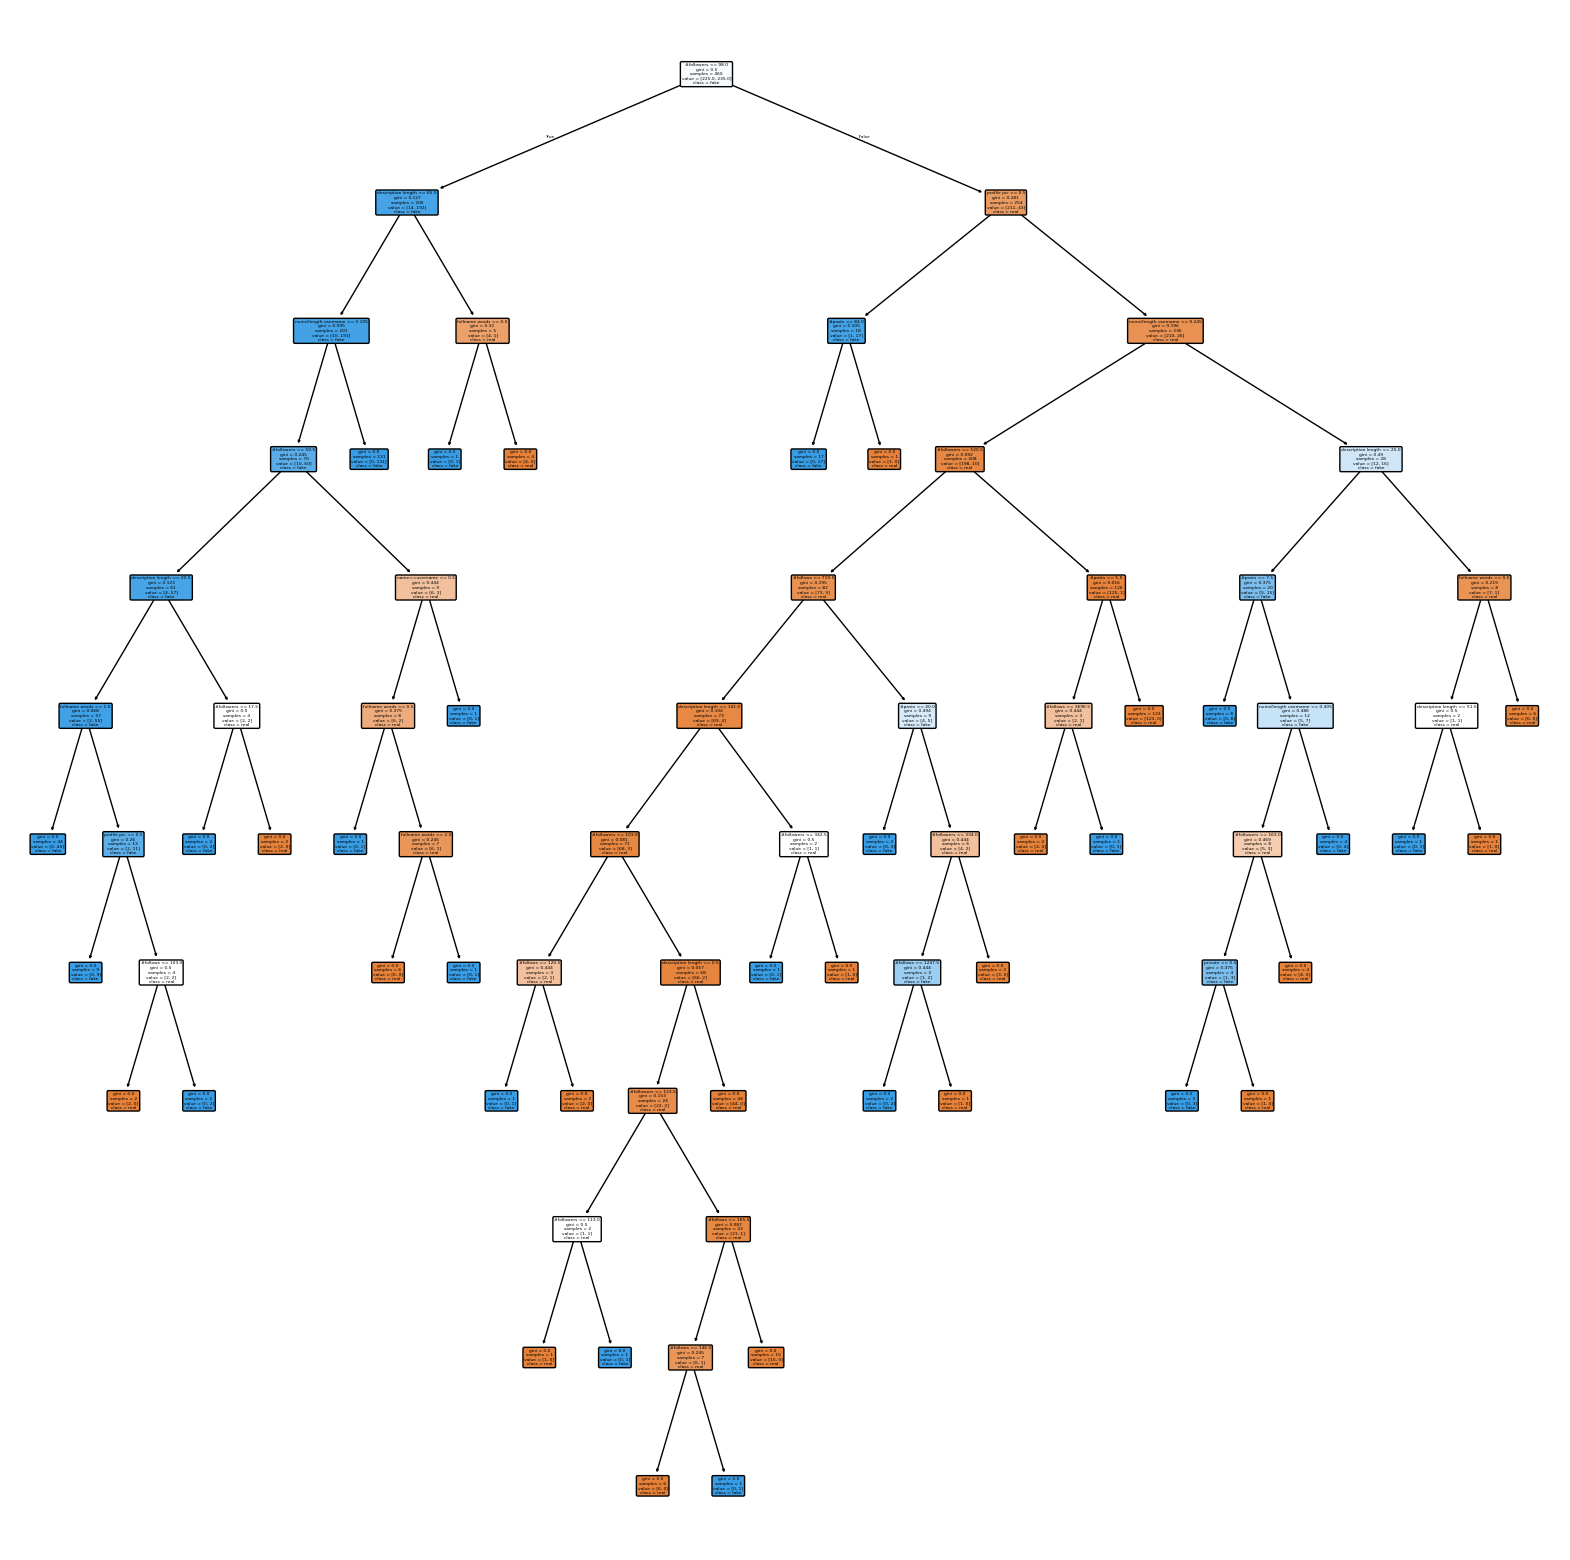

In [ ]:
# explain model with tree plot
from sklearn import tree
plt.figure(figsize=(20,20))
tree.plot_tree(model, filled=True, feature_names=X.columns,
class_names=['real', 'fake'], rounded=True)

plt.show()

In [ ]:
model.feature_importances_

array([0.10729194, 0.07596586, 0.02533821, 0.        , 0.00434988,
       0.05917149, 0.        , 0.00652482, 0.02603025, 0.6434448 ,
       0.05188275])

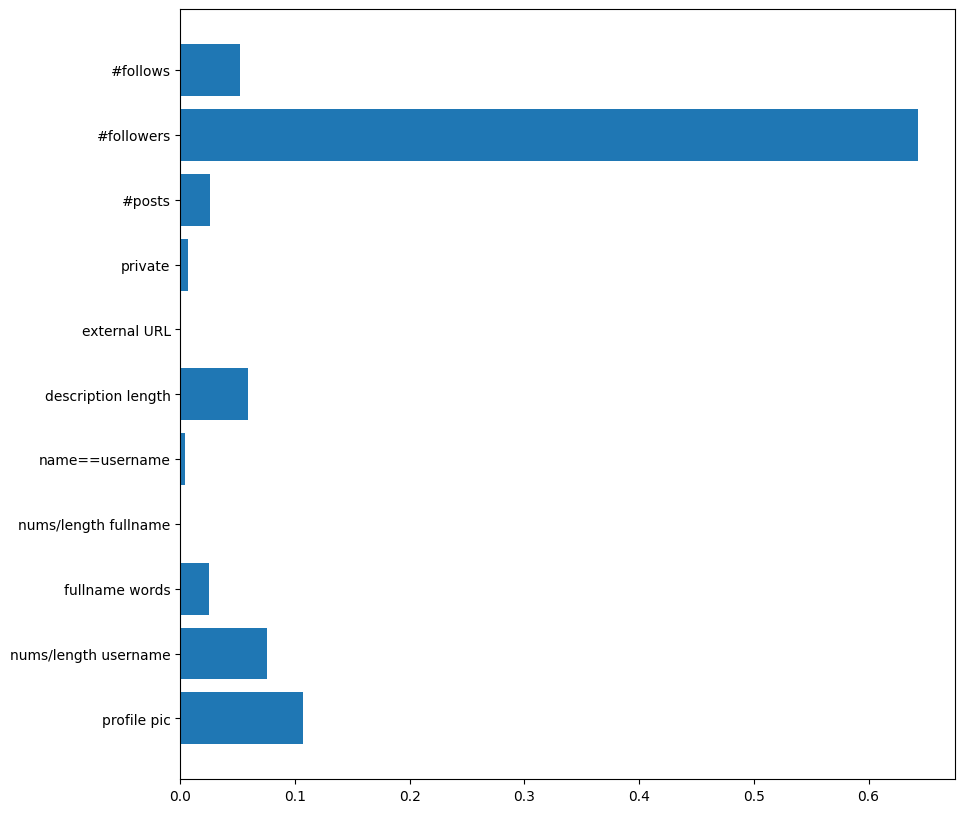

In [ ]:
# plot feature importance
plt.figure(figsize=(10,10))

plt.barh(X.columns, model.feature_importances_)
plt.show()

In [ ]:
df_test =pd.read_csv('/content/test.csv')

In [ ]:
df_test.head()

,profile pic,nums/length username,fullname words,nums/length fullname,name==username,description length,external URL,private,#posts,#followers,#follows,fake
0,1,0.33,1,0.33,1,30,0,1,35,488,604,0
1,1,0.00,5,0.00,0,64,0,1,3,35,6,0
2,1,0.00,2,0.00,0,82,0,1,319,328,668,0
3,1,0.00,1,0.00,0,143,0,1,273,14890,7369,0
4,1,0.50,1,0.00,0,76,0,1,6,225,356,0


In [ ]:
X_test = df_test.drop('fake', axis=1)

In [ ]:
y_pred = model.predict(X_test)

In [ ]:
y_pred

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 0, 1, 1])

In [ ]:
accuracy_score(df_test['fake'], y_pred)

0.9333333333333333

In [ ]:
print(confusion_matrix(df_test['fake'], y_pred))

[[56  4]
 [ 4 56]]


In [ ]:
print(classification_report(df_test['fake'], y_pred))

              precision    recall  f1-score   support

           0       0.93      0.93      0.93        60
           1       0.93      0.93      0.93        60

    accuracy                           0.93       120
   macro avg       0.93      0.93      0.93       120
weighted avg       0.93      0.93      0.93       120



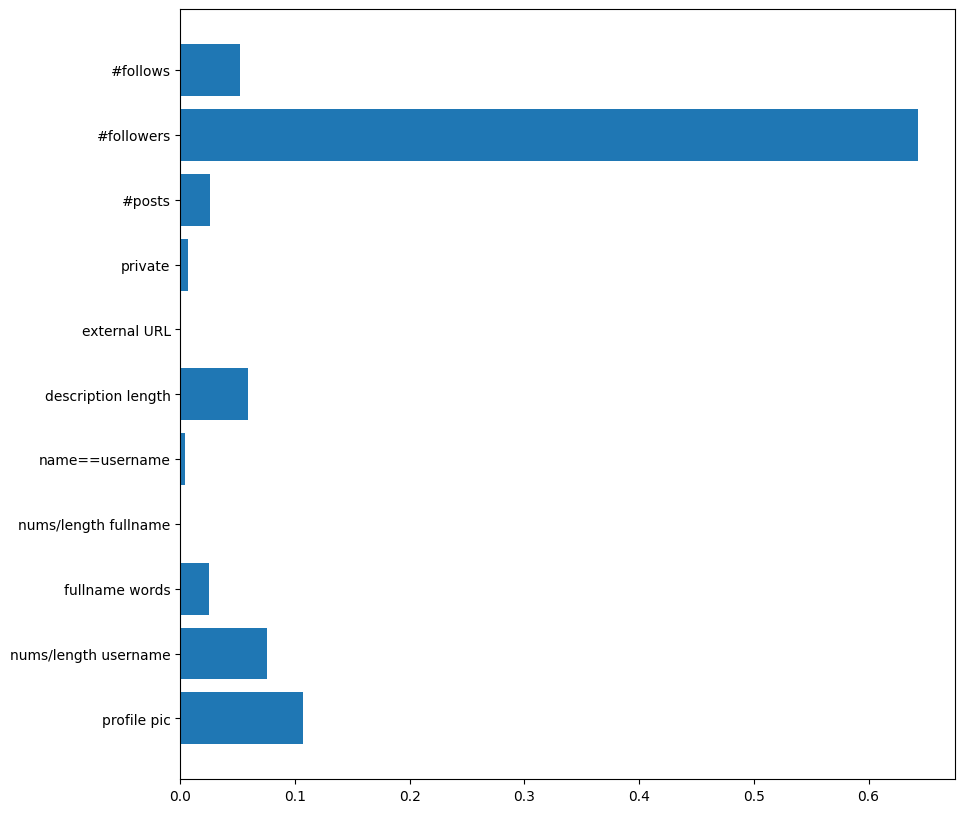

In [ ]:
plt.figure(figsize=(10,10))
plt.barh(X_test.columns, model.feature_importances_)
plt.show()